In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
with open ("../input/startup-funding/startup_funding.csv",encoding='Latin-1') as file_obj:
    file_data=csv.DictReader(file_obj,skipinitialspace=True)
    year=[]
    for row in file_data:
        year.append(row['Date'][len(row['Date'])-4:])
    np_year=np.array(year)
    dic1=dict()
    for i in np_year:
        if i in dic1.keys():
            dic1[i] +=1
        else:
            dic1[i]=1
    x=[]
    y=[]
    for i in dic1.keys():
        x.append(i)
        y.append(dic1[i])
    x=x[::-1]
    y=y[::-1]
    plt.plot(x,y,color='orange',linewidth=6)
    plt.xticks(x)
    plt.xlabel('year',size=15)
    plt.ylabel('Number of fundings',size=15)
    plt.yticks(size=20)
    plt.xticks(size=20)
    plt.show()

    for i in range(len(x)):
        print(x[i], y[i])

# Q2
Find out which cities are generally chosen for starting a startup.
Find top 10 Indian cities which have most number of startups ?
Plot a pie chart and visualise it.
Print the city name and number of startups in that city also.

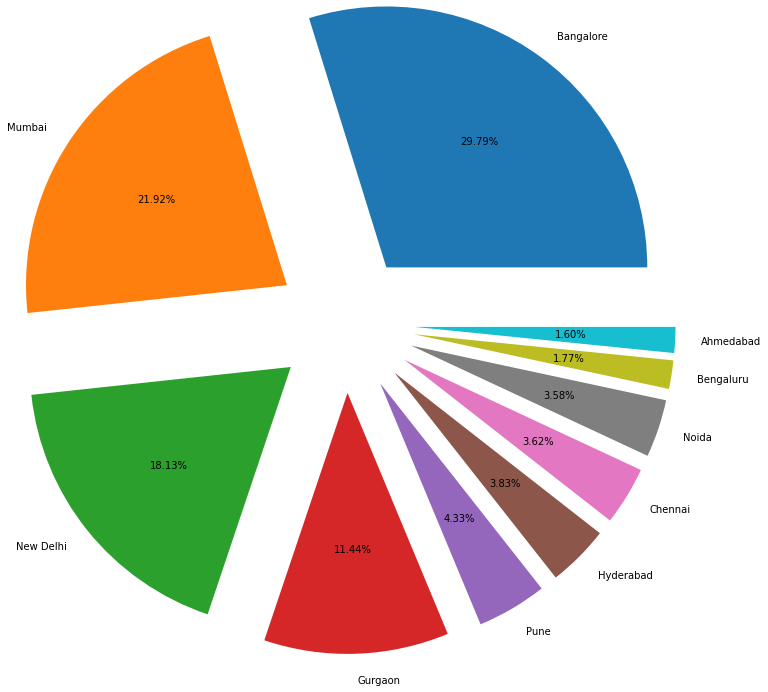

Bangalore 708
Mumbai 521
New Delhi 431
Gurgaon 272
Pune 103
Hyderabad 91
Chennai 86
Noida 85
Bengaluru 42
Ahmedabad 38


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
with open("../input/startup-funding/startup_funding.csv",encoding ='Latin-1') as file_obj:
    file_data=csv.DictReader(file_obj,skipinitialspace=True)
    cities=[]
    for row in file_data:
        cities.append(row['CityLocation'])
    np_city=np.array(cities)
    np_city=np_city[np_city != '']
    
    for i in range(len(np_city)):
        if 'bangalore' in np_city[i]:
            np_city[i]='Bangalore'
        if np_city[i]=='Delhi':
            np_city[i]='New Delhi'
    dic1=dict()
    for i in range(len(np_city)):
        np_city[i]=np_city[i].split('/')[0].strip()
    for i in np_city:
        if i in dic1.keys():
            dic1[i] +=1
        else:
            dic1[i]=1
    x=[]
    y=[]
    for i in dic1.keys():
        x.append(i)
        y.append(dic1[i])
    np_x=np.array(x)
    np_y=np.array(y)
    np_x=np_x[np.argsort(np_y)]
    np_y=np.sort(np_y)
    
    np_x=np_x[len(np_x)-1:len(np_x)-1-10:-1]
    np_y=np_y[len(np_y)-1:len(np_y)-1-10:-1]

    plt.pie(np_y, labels=np_x, autopct='%.2f%%', radius=3, explode=[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8])
    plt.show()
    
    for i in range(len(np_x)):
        print(np_x[i], np_y[i])

# Q.3
Find out if cities play any role in receiving funding.
Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
Print the city and percentage with 2 decimal place after rounding off.
Note:
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the percentage of funding.

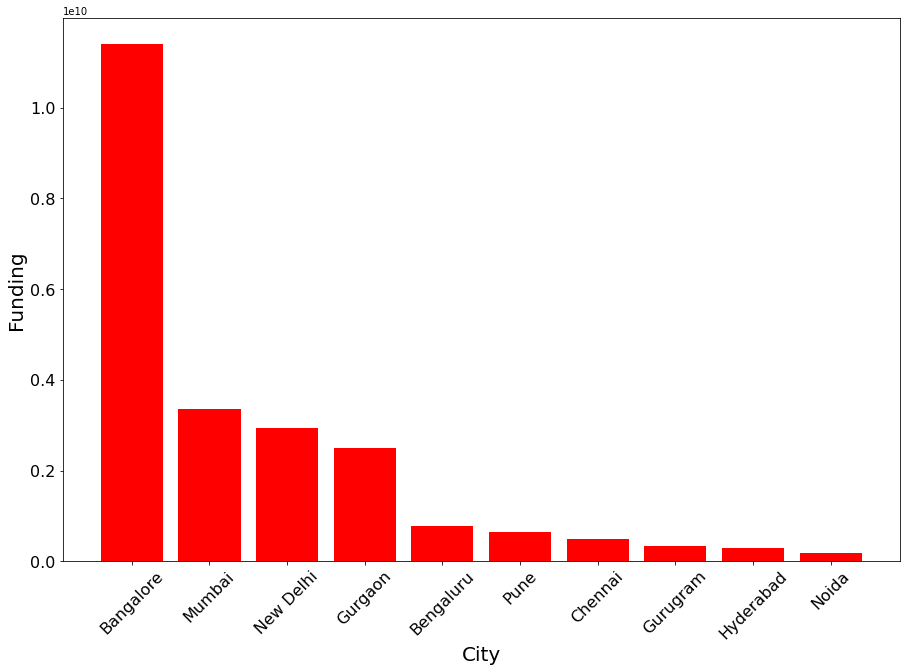

Bangalore 49.70
Mumbai 14.61
New Delhi 12.83
Gurgaon 10.89
Bengaluru 3.36
Pune 2.86
Chennai 2.20
Gurugram 1.46
Hyderabad 1.29
Noida 0.80


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("../input/startup-funding/startup_funding.csv",encoding ='Latin-1')
df=data.copy()
df.drop(df.index[df.CityLocation.isnull()], inplace=True)
df.reset_index(inplace=True, drop=True)
df.loc[df['AmountInUSD'].isnull(), 'AmountInUSD']='0'
df.loc[df.CityLocation=='bangalore','CityLocation']='Bangalore'
df.loc[df.CityLocation=='Delhi', 'CityLocation']='New Delhi'
city=[]
amount=[]
for i in df.CityLocation:
    city.append(i)
for i in df.AmountInUSD:
    amount.append(i)

for i in range(len(amount)):
    amount[i]=''.join(amount[i].split(','))
    city[i]=city[i].split('/')[0].strip()
np_amount=np.array(amount, dtype='int64')
np_city=np.array(city)

dic=dict()
for i in range(len(np_city)):
    if np_city[i] in dic:
        dic[np_city[i]]+=np_amount[i]
    else:
        dic[np_city[i]]=np_amount[i]
xaxis=list(dic.keys())
yaxis=list(dic.values())

np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)

np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)

np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-10:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-10:-1]

plt.subplots(figsize=(15, 10))
plt.bar(np_xaxis, np_yaxis, color='red')
plt.xticks(rotation=45, size=16)
plt.yticks(size=16)
plt.xlabel('City', size=20)
plt.ylabel('Funding', size=20)
plt.show()

for i in range(len(np_xaxis)):
    print(np_xaxis[i], format((np_yaxis[i]*100)/sum(np_yaxis), '.2f'))

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


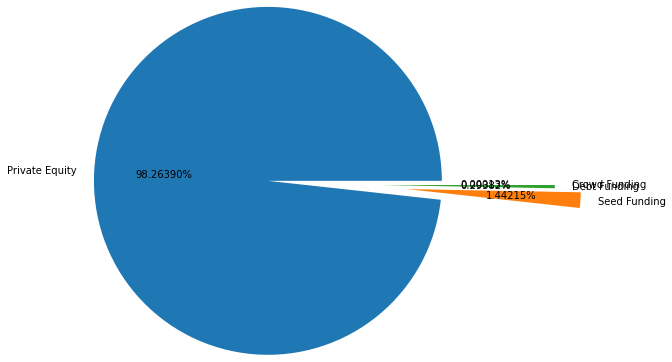

Private Equity 98.26
Seed Funding 1.44
Debt Funding 0.29
Crowd Funding 0.00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("../input/startup-funding/startup_funding.csv",encoding ='Latin-1')
df=data.copy()
df.AmountInUSD.fillna('0', inplace=True)
df.InvestmentType.loc[(df.InvestmentType=='SeedFunding')]='Seed Funding'
df.InvestmentType.loc[(df.InvestmentType=='PrivateEquity')]='Private Equity'
df.InvestmentType.loc[(df.InvestmentType=='DebtFunding')]='Debt Funding'
df.InvestmentType.loc[(df.InvestmentType=='Crowd Funding')]='Crowd Funding'
np_seed_funding=np.array(df.AmountInUSD[df.InvestmentType=='Seed Funding'])
for i in range(len(np_seed_funding)):
    np_seed_funding[i]=''.join(np_seed_funding[i].split(','))
np_seed_funding=np.array(np_seed_funding, dtype='int64')

np_Crowd_Funding=np.array(df.AmountInUSD[df.InvestmentType=='Crowd Funding'])
for i in range(len(np_Crowd_Funding)):
    np_Crowd_Funding[i]=''.join(np_Crowd_Funding[i].split(','))
np_Crowd_Funding=np.array(np_Crowd_Funding, dtype='int64')

np_Debt_Funding=np.array(df.AmountInUSD[df.InvestmentType=='Debt Funding'])
for i in range(len(np_Debt_Funding)):
    np_Debt_Funding[i]=''.join(np_Debt_Funding[i].split(','))
np_Debt_Funding=np.array(np_Debt_Funding, dtype='int64')

np_Private_Equity=np.array(df.AmountInUSD[df.InvestmentType=='Private Equity'])
for i in range(len(np_Private_Equity)):
    np_Private_Equity[i]=''.join(np_Private_Equity[i].split(','))
np_Private_Equity=np.array(np_Private_Equity, dtype='int64')

private=sum(np_Private_Equity)
crowd=sum(np_Crowd_Funding)
debt=sum(np_Debt_Funding)
seed=sum(np_seed_funding)
xaxis=['Private Equity', 'Seed Funding', 'Debt Funding', 'Crowd Funding']
yaxis=[private, seed, debt, crowd]
plt.pie(yaxis, labels=xaxis, autopct='%.5f%%', radius=2, explode=[0.8, 0.8, 0.5, 0.5])
plt.show()
for i in range(len(xaxis)):
    print(xaxis[i], format((yaxis[i]*100)/sum(yaxis), '.2f'))

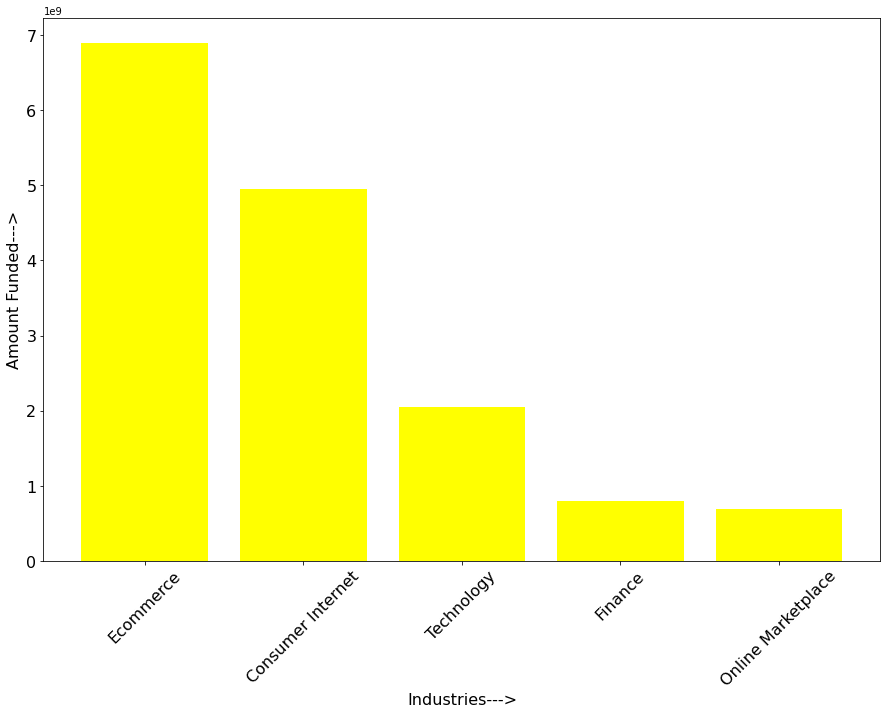

Ecommerce 44.76
Consumer Internet 32.19
Technology 13.32
Finance 5.19
Online Marketplace 4.55


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("../input/startup-funding/startup_funding.csv",encoding ='Latin-1')
df=data.copy()
df.AmountInUSD.loc[df['AmountInUSD'].isnull()]='0'
df.drop(df['SNo'].loc[df.IndustryVertical.isnull()], inplace=True)

np_industry=np.array(df.IndustryVertical)
np_amount=np.array(df.AmountInUSD)
np_industry[np_industry=='eCommerce']='Ecommerce'
np_industry[np_industry=='ECommerce']='Ecommerce'
np_industry[np_industry=='ecommerce']='Ecommerce'

for i in range(len(np_amount)):
    np_amount[i]=''.join(np_amount[i].split(','))
np_amount=np.array(np_amount, dtype='int64')

dic=dict()
for i in range(len(np_amount)):
    if np_industry[i] in dic.keys():
        dic[np_industry[i]]+=np_amount[i]
    else:
        dic[np_industry[i]]=np_amount[i]
xaxis=[]
yaxis=[]

for i in dic.keys():
    xaxis.append(i)
    yaxis.append(dic[i])
np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)

np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)

np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-5:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-5:-1]

plt.subplots(figsize=(15, 10))
plt.bar(np_xaxis, np_yaxis, color='yellow')
plt.xticks(rotation=45, size=16)
plt.xlabel('Industries--->', size=16)
plt.ylabel('Amount Funded--->', size=16)
plt.yticks(size=16)
plt.show()

for i in range(len(np_xaxis)):
    print(np_xaxis[i], format((np_yaxis[i]*100)/sum(np_yaxis) , '.2f'))

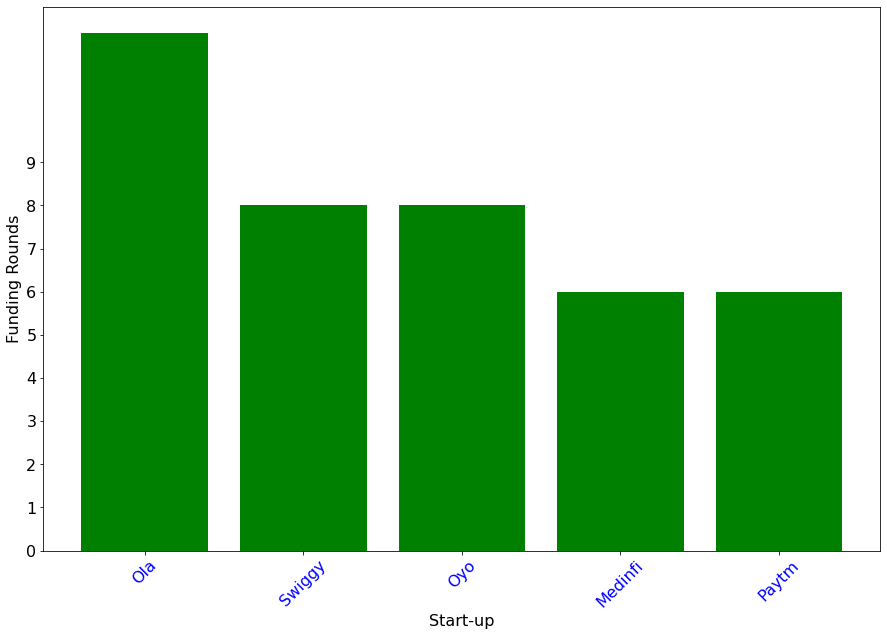

Ola 12
Swiggy 8
Oyo 8
Medinfi 6
Paytm 6


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("../input/startup-funding/startup_funding.csv",encoding='ISO-8859-1')
df=data.copy()
np_startup=np.array(df.StartupName)

for i in range(len(np_startup)):
    if 'Ola' in np_startup[i]:
        np_startup[i]='Ola'
    if 'Flipkart' in np_startup[i]:
        np_startup[i]='Flipkart'
    if 'Oyo' in np_startup[i] or 'OYO Rooms' in np_startup[i]:
        np_startup[i]='Oyo'
    if 'Paytm' in np_startup[i]:
        np_startup[i]='Paytm'

dic=dict()
for i in np_startup:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
x=[]
y=[]
for i in dic.keys():
    x.append(i)
    y.append(dic[i])
np_x=np.array(x)
np_y=np.array(y)
np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)
np_x=np_x[len(np_x)-1:len(np_x)-1-5:-1]
np_y=np_y[len(np_y)-1:len(np_y)-1-5:-1]

plt.subplots(figsize=(15, 10))
plt.bar(np_x, np_y, color='green')
plt.xticks(size=16, rotation=45, color='blue')
plt.yticks(np.arange(0, 10), size=16)
plt.xlabel('Start-up', size=16)
plt.ylabel('Funding Rounds', size=16)
plt.show()
for i in range(len(np_x)):
    print(np_x[i], np_y[i])

In [7]:
data=pd.read_csv("../input/startup-funding/startup_funding.csv",encoding='ISO-8859-1')
df=data.copy()
df.AmountInUSD.loc[df['AmountInUSD'].isnull()]='0'

np_amount=np.array(df.AmountInUSD)
np_startup=np.array(df.StartupName)

for i in range(len(np_amount)):
    np_amount[i]=''.join(np_amount[i].split(','))
np_amount=np.array(np_amount, dtype='int64')
for i in range(len(np_startup)):
    if 'Ola' in np_startup[i]:
        np_startup[i]='Ola'
    if 'Flipkart' in np_startup[i]:
        np_startup[i]='Flipkart'
    if 'Oyo' in np_startup[i]:
        np_startup[i]='Oyo'
    if 'Paytm' in np_startup[i]:
        np_startup[i]='Paytm'
dic=dict()
for i in range(len(np_amount)):
    if np_startup[i] in dic.keys():
        dic[np_startup[i]]+=np_amount[i]
    else:
        dic[np_startup[i]]=np_amount[i]
        
xaxis=[]
yaxis=[]
for i in dic.keys():
    xaxis.append(i)
    yaxis.append(dic[i])
np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)

np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)

np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-5:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-5:-1]

for i in np_xaxis:
    print(i)

Flipkart
Paytm
Ola
Snapdeal
Oyo


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
